In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\internal\__init__.py)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

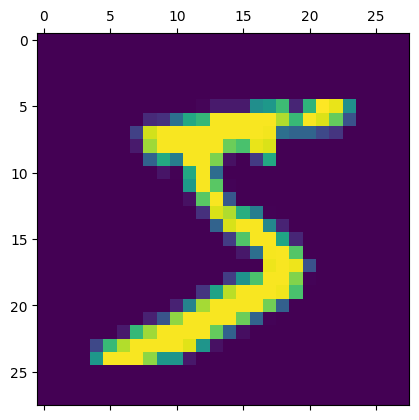

In [3]:
plt.matshow(x_train[0])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.astype("float")/255
x_test = x_test.astype("float")/255

In [6]:
x_train_flat = x_train.reshape(60000 , 28*28)
x_test_flat = x_test.reshape(10000 , 28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10 , activation="sigmoid" , input_shape = (784,))
])
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [8]:
model.fit(x_train_flat , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4650 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9249


In [9]:
model.evaluate(x_test_flat , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2675 - accuracy: 0.9264


[0.2675231099128723, 0.9264000058174133]

In [10]:
y_predict = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [11]:
y_predict[0]

array([2.0863434e-02, 2.7204942e-07, 5.4100964e-02, 9.4088501e-01,
       2.2538067e-03, 8.4578827e-02, 1.0268684e-06, 9.9966449e-01,
       9.4747327e-02, 6.1013836e-01], dtype=float32)

In [12]:
np.argmax(y_predict[0])

7

In [13]:
y_predict = [np.argmax(i) for i in y_predict]

In [14]:
y_predict[:5]

[7, 2, 1, 0, 4]

In [15]:
y_predict[0]

7

In [16]:
ax  = tf.math.confusion_matrix(labels= y_test ,predictions= y_predict)
ax

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    4,    1,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    9,  930,   14,    8,    6,   12,    8,   35,    4],
       [   4,    0,   23,  913,    1,   29,    2,    8,   21,    9],
       [   2,    1,    6,    2,  914,    0,    8,    3,    9,   37],
       [  11,    3,    4,   24,    7,  791,   12,    3,   31,    6],
       [  11,    3,    9,    1,    7,   17,  906,    2,    2,    0],
       [   2,    8,   27,    8,    8,    1,    0,  927,    3,   44],
       [   6,    9,    6,   17,    9,   30,    8,    6,  875,    8],
       [  11,    7,    1,    8,   28,    7,    0,   11,    9,  927]])>

In [17]:
import seaborn as sns

<AxesSubplot:>

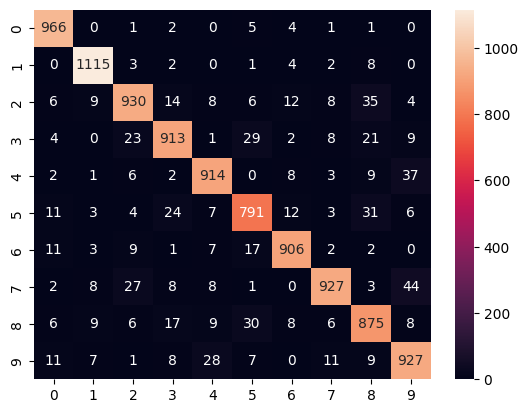

In [18]:
sns.heatmap(ax , annot=True , fmt="d" )

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100 , activation="relu" , input_shape = (784,)),
    keras.layers.Dense(50 , activation="relu" ),
    keras.layers.Dense(10 , activation="sigmoid" ),
])
tf_callback = keras.callbacks.TensorBoard(log_dir="./logs/" , histogram_freq=1)
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [31]:
model.fit(x_train_flat , y_train , epochs=5 , callbacks=[tf_callback])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2581 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1147 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0822 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0626 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9843


In [21]:
model.evaluate(x_test_flat , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9757


[0.08247724175453186, 0.9757000207901001]

In [22]:
y_predict = model.predict(x_test_flat)

313/313 [==============================] - 1s 3ms/step


In [23]:
y_predict[0]

array([4.9355514e-03, 8.5102562e-03, 4.9418914e-01, 7.7211022e-01,
       2.6655055e-04, 1.5721308e-01, 1.5304781e-06, 9.9999887e-01,
       3.5779133e-02, 4.6190012e-01], dtype=float32)

In [24]:
np.argmax(y_predict[0])

7

In [25]:
y_predict = [np.argmax(i) for i in y_predict ]

In [26]:
ax = tf.math.confusion_matrix(y_test , y_predict)

<AxesSubplot:>

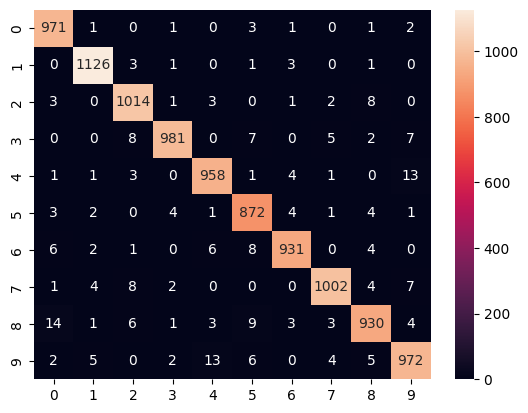

In [27]:
sns.heatmap(ax , annot=True , fmt="d")

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 , activation="relu" ),
    keras.layers.Dense(50 , activation="relu" ),
    keras.layers.Dense(10 , activation="sigmoid" ),
])
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [29]:
model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2624 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1111 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0605 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9842


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [1]:
import tensorflow as tf

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(tf.test.is_built_with_cuda()) 
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
